# Lymphography Dataset - (Neural Networks)

## Building the Deep learning model on Lymphography dataset:

This analysis aims to observe which features are most helpful in prediction and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to enhance lymphatic diseases diagnosis. To achieve this I have used Deep learning (Neural Networks) method to fit a model that can predict the discrete class of new input.

### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import warnings
import warnings
warnings.filterwarnings('ignore')

### Load the Data:

In [2]:
df = pd.read_csv("C:\\projects\\Lymphography_project\\data\\lymphography.csv")
df.head()

,3,4,2,1,1.1,1.2,1.3,1.4,2.1,1.5,2.2,2.3,2.4,4.1,8,1.6,1.7,2.5,2.6
0,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4


#### We see in the dataset there is no column values. To add the headers list all the column names.

In [3]:
# column names that gives in txt file..

df.columns = ['class','lymphatics','block of affere','bl. of lymph. c','bl. of lymph. s','by pass','extravasates','regeneration of',
            'early uptake in','lym.nodes dimin','lym.nodes enlar','changes in lym','defect in node','changes in node',
            'changes in stru','special forms','dislocation of','exclusion of no','no. of nodes in']

In [4]:
df.head()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4


In [5]:
# let's check the shape of the dataset..

df.shape

(147, 19)

In [6]:
# findout the null values..

df.isnull().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym     0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

so, there is no null values are present in our dataset.

In [7]:
# type of the columns..

df.dtypes

class              int64
lymphatics         int64
block of affere    int64
bl. of lymph. c    int64
bl. of lymph. s    int64
by pass            int64
extravasates       int64
regeneration of    int64
early uptake in    int64
lym.nodes dimin    int64
lym.nodes enlar    int64
changes in lym     int64
defect in node     int64
changes in node    int64
changes in stru    int64
special forms      int64
dislocation of     int64
exclusion of no    int64
no. of nodes in    int64
dtype: object

In [8]:
# let's do some stastical analysis on our data..

df.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,2.448980,2.734694,1.551020,1.176871,1.047619,1.244898,1.510204,1.068027,1.700680,1.061224,2.476190,2.401361,2.972789,2.795918,5.197279,2.340136,1.666667,1.789116,2.605442
std,0.575572,0.813638,0.499091,0.382864,0.213687,0.431497,0.501605,0.252653,0.459526,0.314588,0.838568,0.569305,0.867571,0.757960,2.166493,0.771909,0.473016,0.409331,1.910884
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [9]:
# to check the duplicate columns..

df.columns

Index(['class', 'lymphatics', 'block of affere', 'bl. of lymph. c',
       'bl. of lymph. s', 'by pass', 'extravasates', 'regeneration of',
       'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar',
       'changes in lym', 'defect in node', 'changes in node',
       'changes in stru', 'special forms', 'dislocation of', 'exclusion of no',
       'no. of nodes in'],
      dtype='object')

<AxesSubplot:>

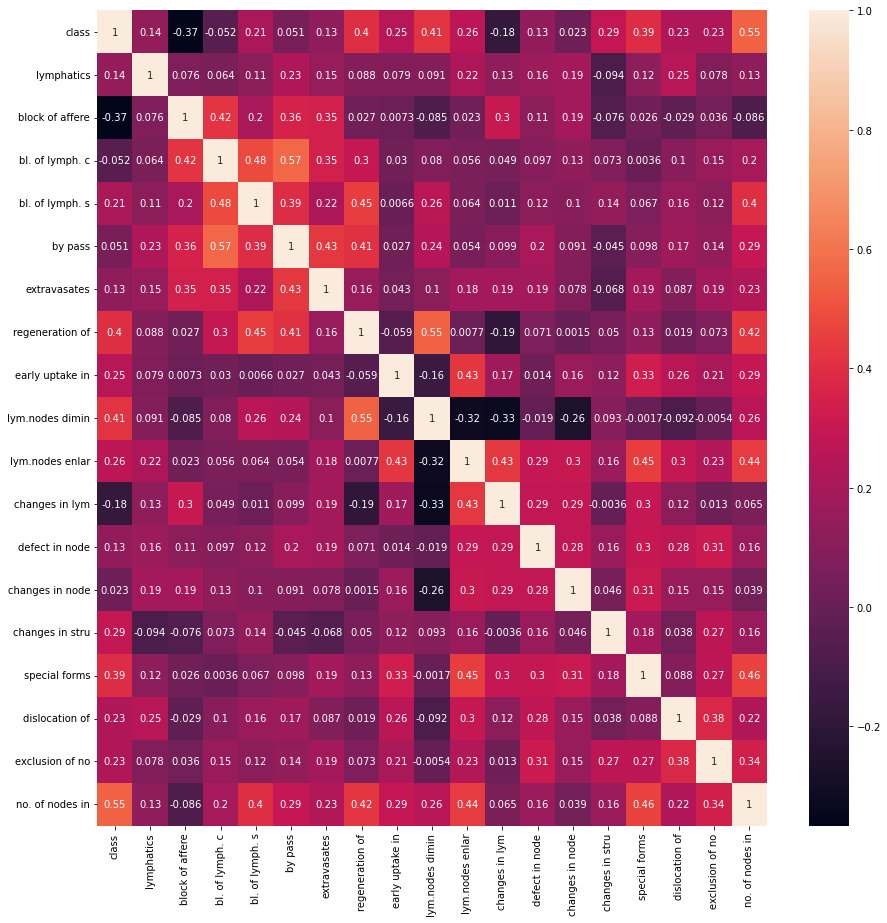

In [10]:
# plt a heat map..

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

### Let's split our dataset:

In [11]:
# here our target column is class..

y = df['class']
x = df.drop('class',axis=1)

In [12]:
x.shape, y.shape

((147, 18), (147,))

### Let's check the data is Balansed or Imbalanced:

In [13]:
df['class'].value_counts()

2    81
3    60
4     4
1     2
Name: class, dtype: int64

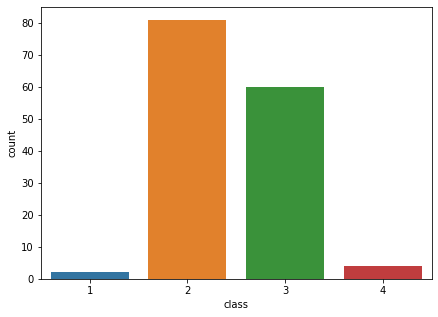

In [14]:
# let's plot the countplot to better understanding..

plt.figure(figsize=(7,5))
sns.countplot(df['class'])
plt.show()

In the target column i.e 'class' has 4 attributes refers to:

 - 1 - normal find
 - 2 - metastases
 - 3 - malgin lymph
 - 4 - fibrosis

Here, we see that class-2 has majority compared to class 1&2. It is called ' data imbalancing'.
To overcome this we use " Imbalearn SMOT algorithm " to balance the data.

### Balance the data(SMOT):

In [15]:

!pip install imbalanced-Learn

In [16]:
# import SMOT..

from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

over_sample = SMOTE(k_neighbors=1)
x_sm,y_sm = over_sample.fit_resample(x,y)

In [17]:
x_sm.shape, y_sm.shape

((324, 18), (324,))

### Train and Test the data:


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((259, 18), (259,), (65, 18), (65,))

### Creating a model using Neural-Networks:

In [20]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = keras.Sequential([
    keras.layers.Dense(20, input_dim=x_train.shape[1], activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss = 'CategoricalCrossentropy',
             metrics = ['accuracy'])

train_model = model.fit(x_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
9/9 [==============================] - 5s 8ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accura

9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 82/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 83/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 84/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 85/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 86/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 87/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 88/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 89/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2471
Epoch 90/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                380       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 711
Trainable params: 711
Non-trainable params: 0
_________________________________________________________________


In [22]:
# accuracy of model..

model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2615


[0.0, 0.26153847575187683]

In [23]:
# predict the model..

y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

3/3 [==============================] - 0s 3ms/step


In [24]:
# classification report..

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.26      1.00      0.41        17
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        16

    accuracy                           0.26        65
   macro avg       0.07      0.25      0.10        65
weighted avg       0.07      0.26      0.11        65



<AxesSubplot:>

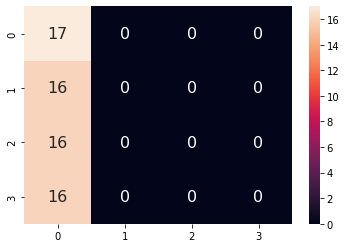

In [25]:
# confusion matrix..

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, annot_kws={"size": 16})

## GridSearchCV:

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# to check parameters of model
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [27]:
parameter = {   'bootstrap'   : [True],
                'max_depth'   : [i for i in range(3,20)],
                'criterion'   : ['entropy'],
                'n_estimators': [i for i in range(3,20)],
                'max_features': ['auto', 'log2']    }

gscv = GridSearchCV(RandomForestClassifier(),parameter,cv=10,n_jobs=-1,verbose=1)

model2 = gscv.fit(x_train,y_train)

Fitting 10 folds for each of 578 candidates, totalling 5780 fits


In [28]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=12, max_features='log2',
                       n_estimators=19)

In [29]:
gscv.best_score_

0.9576923076923076

In [30]:
y_pred_gscv = gscv.predict(x_test)

In [31]:
print(classification_report(y_test, y_pred_gscv))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.92      0.75      0.83        16
           3       0.79      0.94      0.86        16
           4       1.00      1.00      1.00        16

    accuracy                           0.92        65
   macro avg       0.93      0.92      0.92        65
weighted avg       0.93      0.92      0.92        65



<AxesSubplot:>

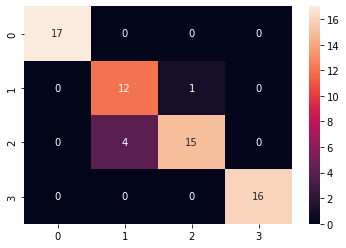

In [32]:
sns.heatmap(confusion_matrix(y_pred_gscv,y_test),annot=True)

## Accuracy and Loss curve:

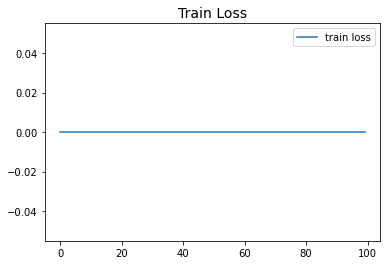

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(train_model.history['loss'], label='train loss')

# plt.plot(r.history['val_loss'], label='val loss')

plt.title('Train Loss', size=14)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

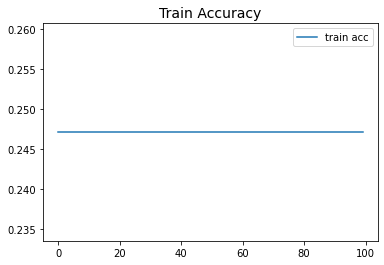

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(train_model.history['accuracy'], label='train acc')

# plt.plot(hist.history['val_accuracy'], label='val acc')

plt.title('Train Accuracy', size=14)
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Test the model:

In [50]:
model2.score(x_test, y_test)

0.9230769230769231

In [51]:
accuracy_score(y_test, y_pred_gscv)

0.9230769230769231

In [64]:
gscv.best_score_

0.9576923076923076